## Object Creation

In [114]:
import numpy as np
import pandas as pd
print(pd.__version__)

1.2.2


In [115]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [116]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates,
columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01  1.614228 -1.119848  0.244968 -0.033121
2013-01-02  0.907795  0.603600 -0.637215 -0.233750
2013-01-03 -0.393224  0.271549 -0.083567 -0.264168
2013-01-04 -0.449971  0.009497  0.242077 -0.282725
2013-01-05 -0.517610  0.959163 -0.017970  1.078238
2013-01-06  0.404566  0.079948  0.073158 -1.258122


In [117]:
df2 = pd.DataFrame({
'A': np.random.randint(0,10, size=5),
'B': pd.Series(2, index=list(range(5)), dtype='float32'),
'C': np.array([3]*5, dtype='int32'),
'D': pd.Categorical(["test", "train", "test", "train", "train"]),
'E': 'foo',
'F': pd.date_range(end='20131231', periods=5)})

In [118]:
print(df2)

   A    B  C      D    E          F
0  4  2.0  3   test  foo 2013-12-27
1  6  2.0  3  train  foo 2013-12-28
2  9  2.0  3   test  foo 2013-12-29
3  2  2.0  3  train  foo 2013-12-30
4  7  2.0  3  train  foo 2013-12-31


## Viewing Data

In [119]:
df.to_numpy()

array([[ 1.61422775, -1.11984816,  0.24496779, -0.03312133],
       [ 0.90779504,  0.60360032, -0.63721512, -0.23374999],
       [-0.39322361,  0.27154916, -0.08356711, -0.26416765],
       [-0.44997129,  0.00949727,  0.24207728, -0.28272452],
       [-0.51760955,  0.95916251, -0.01797044,  1.07823813],
       [ 0.40456638,  0.0799481 ,  0.07315771, -1.25812187]])

In [120]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.033121,0.244968,-1.119848,1.614228
2013-01-02,-0.233750,-0.637215,0.603600,0.907795
2013-01-03,-0.264168,-0.083567,0.271549,-0.393224
2013-01-04,-0.282725,0.242077,0.009497,-0.449971
2013-01-05,1.078238,-0.017970,0.959163,-0.517610
2013-01-06,-1.258122,0.073158,0.079948,0.404566


In [121]:
df.sort_values(by='A')

,A,B,C,D
2013-01-05,-0.517610,0.959163,-0.017970,1.078238
2013-01-04,-0.449971,0.009497,0.242077,-0.282725
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168
2013-01-06,0.404566,0.079948,0.073158,-1.258122
2013-01-02,0.907795,0.603600,-0.637215,-0.233750
2013-01-01,1.614228,-1.119848,0.244968,-0.033121


## Selection

In [122]:
df['B']

2013-01-01   -1.119848
2013-01-02    0.603600
2013-01-03    0.271549
2013-01-04    0.009497
2013-01-05    0.959163
2013-01-06    0.079948
Freq: D, Name: B, dtype: float64

## Selection by Label

In [123]:
df.loc[dates[0]]

A    1.614228
B   -1.119848
C    0.244968
D   -0.033121
Name: 2013-01-01 00:00:00, dtype: float64

In [124]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.614228,-1.119848
2013-01-02,0.907795,0.603600
2013-01-03,-0.393224,0.271549
2013-01-04,-0.449971,0.009497
2013-01-05,-0.517610,0.959163
2013-01-06,0.404566,0.079948


## Selection by Position

In [125]:
df.iloc[3]


A   -0.449971
B    0.009497
C    0.242077
D   -0.282725
Name: 2013-01-04 00:00:00, dtype: float64

In [126]:
df.iloc[3][1]

0.009497267043369562

In [127]:
df.iloc[3]['B']

0.009497267043369562

In [128]:
df.loc[:, ['A']]

,A
2013-01-01,1.614228
2013-01-02,0.907795
2013-01-03,-0.393224
2013-01-04,-0.449971
2013-01-05,-0.517610
2013-01-06,0.404566


## Boolean Indexing

In [129]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.614228,-1.119848,0.244968,-0.033121
2013-01-02,0.907795,0.603600,-0.637215,-0.233750
2013-01-06,0.404566,0.079948,0.073158,-1.258122


In [132]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168,two
2013-01-05,-0.517610,0.959163,-0.017970,1.078238,four


## Setting

In [133]:
s1 = pd.Series([1, 2, 3, 4, 5, 6],
index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.614228,-1.119848,0.244968,-0.033121,NaN
2013-01-02,0.907795,0.603600,-0.637215,-0.233750,1.0
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168,2.0
2013-01-04,-0.449971,0.009497,0.242077,-0.282725,3.0
2013-01-05,-0.517610,0.959163,-0.017970,1.078238,4.0
2013-01-06,0.404566,0.079948,0.073158,-1.258122,5.0


In [137]:
df.at[dates[0], 'A']=0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.119848,0.244968,-0.033121,NaN
2013-01-02,0.907795,0.603600,-0.637215,-0.233750,1.0
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168,2.0
2013-01-04,-0.449971,0.009497,0.242077,-0.282725,3.0
2013-01-05,-0.517610,0.959163,-0.017970,1.078238,4.0
2013-01-06,0.404566,0.079948,0.073158,-1.258122,5.0


In [138]:
df.iat[0,1]=0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.244968,-0.033121,NaN
2013-01-02,0.907795,0.603600,-0.637215,-0.233750,1.0
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168,2.0
2013-01-04,-0.449971,0.009497,0.242077,-0.282725,3.0
2013-01-05,-0.517610,0.959163,-0.017970,1.078238,4.0
2013-01-06,0.404566,0.079948,0.073158,-1.258122,5.0


## Missing Data

In [139]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.244968,-0.033121,NaN,1.0
2013-01-02,0.907795,0.603600,-0.637215,-0.233750,1.0,1.0
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168,2.0,NaN
2013-01-04,-0.449971,0.009497,0.242077,-0.282725,3.0,NaN


In [140]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.907795,0.6036,-0.637215,-0.23375,1.0,1.0


In [141]:
df1.fillna(value=10)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.244968,-0.033121,10.0,1.0
2013-01-02,0.907795,0.603600,-0.637215,-0.233750,1.0,1.0
2013-01-03,-0.393224,0.271549,-0.083567,-0.264168,2.0,10.0
2013-01-04,-0.449971,0.009497,0.242077,-0.282725,3.0,10.0


In [142]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations 1

In [143]:
# Performing a descriptive statistic:
df.mean()


A   -0.008074
B    0.320626
C   -0.029758
D   -0.165608
F    3.000000
dtype: float64

In [144]:
# Same operation on the other axis:
df.mean(1)


2013-01-01    0.052962
2013-01-02    0.328086
2013-01-03    0.306118
2013-01-04    0.503776
2013-01-05    1.100364
2013-01-06    0.859910
Freq: D, dtype: float64

In [145]:
#Subtraction of dataframe and other,
# element-wise (binary operator sub).
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.393224,-0.728451,-1.083567,-1.264168,1.0
2013-01-04,-3.449971,-2.990503,-2.757923,-3.282725,0.0
2013-01-05,-5.517610,-4.040837,-5.017970,-3.921762,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [146]:
# applying functions to the data
df.apply(np.cumsum)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.244968,-0.033121,NaN
2013-01-02,0.907795,0.603600,-0.392247,-0.266871,1.0
2013-01-03,0.514571,0.875149,-0.475814,-0.531039,3.0
2013-01-04,0.064600,0.884647,-0.233737,-0.813763,6.0
2013-01-05,-0.453009,1.843809,-0.251708,0.264475,10.0
2013-01-06,-0.048443,1.923757,-0.178550,-0.993647,15.0


In [147]:
df.apply(np.cumsum, axis=1)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.244968,0.211846,NaN
2013-01-02,0.907795,1.511395,0.874180,0.640430,1.640430
2013-01-03,-0.393224,-0.121674,-0.205242,-0.469409,1.530591
2013-01-04,-0.449971,-0.440474,-0.198397,-0.481121,2.518879
2013-01-05,-0.517610,0.441553,0.423583,1.501821,5.501821
2013-01-06,0.404566,0.484514,0.557672,-0.700450,4.299550


In [148]:
df.apply(lambda x: x.max() - x.min())

A    1.425405
B    0.959163
C    0.882183
D    2.336360
F    4.000000
dtype: float64

## Operations 2

<AxesSubplot:>

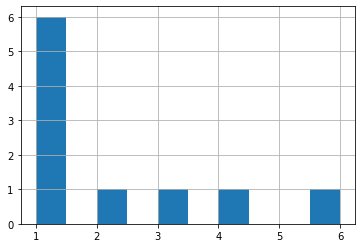

In [149]:
# histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()
s.hist() # bins=10


In [150]:
# string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan,
'CABA', 'dog', 'cat'])
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [151]:
# Concatenating pandas objects together with concat():
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.956256,-0.206809,0.638368,0.586734
1,0.379961,1.237795,0.861321,0.421223
2,0.493552,0.202524,1.050735,-1.056732
3,0.197434,-2.791327,-0.490811,-0.199723
4,-0.305391,-1.132838,0.345656,-0.216541
5,-1.761507,1.161282,-0.450207,-1.351623
6,-1.634281,1.060921,-0.883554,0.375158
7,0.379928,-0.050987,-0.635753,-1.378156
8,-2.089333,-0.264606,-0.009319,1.028418
9,-1.023049,0.101308,-0.400578,-1.635924


In [152]:
# break into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.956256 -0.206809  0.638368  0.586734
 1  0.379961  1.237795  0.861321  0.421223
 2  0.493552  0.202524  1.050735 -1.056732,
           0         1         2         3
 3  0.197434 -2.791327 -0.490811 -0.199723
 4 -0.305391 -1.132838  0.345656 -0.216541
 5 -1.761507  1.161282 -0.450207 -1.351623
 6 -1.634281  1.060921 -0.883554  0.375158,
           0         1         2         3
 7  0.379928 -0.050987 -0.635753 -1.378156
 8 -2.089333 -0.264606 -0.009319  1.028418
 9 -1.023049  0.101308 -0.400578 -1.635924]

In [153]:
pd.concat(pieces)

,0,1,2,3
0,0.956256,-0.206809,0.638368,0.586734
1,0.379961,1.237795,0.861321,0.421223
2,0.493552,0.202524,1.050735,-1.056732
3,0.197434,-2.791327,-0.490811,-0.199723
4,-0.305391,-1.132838,0.345656,-0.216541
5,-1.761507,1.161282,-0.450207,-1.351623
6,-1.634281,1.060921,-0.883554,0.375158
7,0.379928,-0.050987,-0.635753,-1.378156
8,-2.089333,-0.264606,-0.009319,1.028418
9,-1.023049,0.101308,-0.400578,-1.635924


## Operations 3

In [154]:
# join: for SQL style merges
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [155]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [156]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [157]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,bar,2,5


In [158]:
# Append rows to a dataframe
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.056268,-0.403532,1.077058,1.386213
1,0.423341,-0.617128,-0.232685,-1.120710
2,-1.415631,1.024699,-0.639874,0.379807
3,1.122275,0.411738,-0.448506,0.827489
4,0.404596,0.163694,-0.631744,-0.640295
5,0.878133,1.072721,-0.733086,0.195063
6,-0.413133,-1.006692,1.419501,0.297774
7,0.508941,-1.698295,1.467241,-1.554773
8,1.122275,0.411738,-0.448506,0.827489


## Grouping

In [160]:
df = pd.DataFrame({
'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
'C': np.random.randn(8),
'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,-0.689983,0.303112
1,bar,one,0.633222,-0.491153
2,foo,two,-0.217183,-2.923411
3,bar,three,-0.293793,-0.931951
4,foo,two,0.879984,1.478992
5,bar,two,1.461921,-1.227257
6,foo,one,-1.259395,-1.775428
7,foo,three,-0.221557,-1.082115


In [161]:
#Grouping and then applying the sum()
# function to the resulting groups.
df.groupby('A').sum()


,C,D
A,,
bar,1.801349,-2.650362
foo,-1.508134,-3.998849


In [162]:
#Grouping by multiple columns forms a hierarchical index,
# and again we can apply the sum function.
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.633222 -0.491153
    three -0.293793 -0.931951
    two    1.461921 -1.227257
foo one   -1.949378 -1.472316
    three -0.221557 -1.082115
    two    0.662801 -1.444419

## Reshaping

In [163]:
# pivot tables
df = pd.DataFrame({
'A': ['one', 'one', 'two', 'three'] * 3,
'B': ['A', 'B', 'C'] * 4,
'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
'D': np.random.randn(12),
'E': np.random.randn(12)
})
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.317949 -1.216701
      B  0.604355 -0.768641
      C  1.009960 -0.964037
three A -1.489951       NaN
      B       NaN  0.193993
      C -0.709678       NaN
two   A       NaN  2.107641
      B  0.187758       NaN
      C       NaN  1.843122

## Categoricals

In [164]:
# pandas can include categorical data in a DataFrame
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [165]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [166]:
#Rename the categories to more meaningful names
# (assigning to Series.cat.categories is inplace!).
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [167]:
#Reorder categories and simultaneously add missing categories
# (methods under Series .cat return a new Series by default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


## Plotting

In [168]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts

2000-01-01    -0.906748
2000-01-02    -0.457542
2000-01-03    -1.200335
2000-01-04    -2.558937
2000-01-05    -3.369050
                ...    
2002-09-22    13.621152
2002-09-23    15.448777
2002-09-24    14.299411
2002-09-25    14.907742
2002-09-26    14.147780
Freq: D, Length: 1000, dtype: float64

No handles with labels found to put in legend.


<AxesSubplot:>

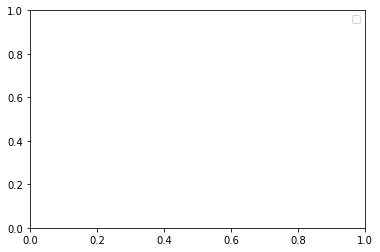

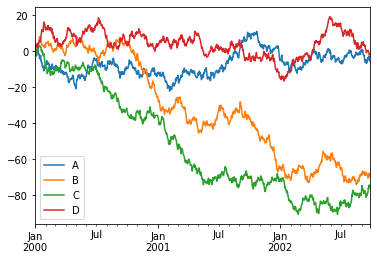

In [169]:
import matplotlib.pyplot as plt
#On a DataFrame, the plot() method is a convenience to plot
# all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
plt.legend(loc='best')
df.plot()